This notebook is meant for the students of Basics of Applied Mathematics, in the master of Mathematics in Data and Technology, Freiburg Univsersity, 2025

# Programming Exercise for Homework 6

### Your task

This notebook contains some code snippets with missing lines that you will have to fill in! Please also try to read and understand the parts that you do not have to fill in to understand better how the code works.

In [4]:
import numpy as np # Package for array manipulations
import matplotlib.pyplot as plt # Package for plotting

# Jupyter magic command to make the plots a bit nicer
%matplotlib inline
                     #  replace with "%matplotlib inline" in case one uses the VS code UI
                     #  replace with "%matplotlib notebook" in case one uses the Jupyter UI

## Programming tasks for exercise 2 (a function approximation problem)

### Description 

The task is to approximate an unknown function $g(\cdot)$ using a least-squares approach.
We have access to some measurements $y_j = g(t_j)$ at given points $t_1, t_2, \dots, t_m$.
Recall that the approximation function is given by solving the following least-squares problem ( problem (3) from the exercise sheet):
\begin{align*}
    \underset{x\in\R^n}{\textup{minimize}} \quad \sum_{j=1}^{m} \big( y_j - \Phi(t_j ; x) \big)^2,
\end{align*}
where $\Phi(t_j ; x) = \sum_{i=1}^{n} x_i \varphi_i(t_j)$ is a linear combination of given basis functions $\varphi_1(\cdot), \varphi_2(\cdot), \dots, \varphi_n(\cdot)$.

The function $g(\cdot)$ that we want to approximate is defined as:
$$
    g(t) \coloneqq \lvert t - k \rvert, \quad \text{for } t \in [k-1/2, k+1/2],
$$
which is evaluated for the time points $t_j = 0.3, 0.6, \dots, 3.0$ (i.e., $m=10$).

The basis functions are given as:
$$
    \varphi_1(t) = 1, \quad \varphi_2(t) = \sin(\pi t), \quad \varphi_3(t) = \cos(\pi t),
$$
i.e., $n=3$.

### Create the data

In [5]:
def g(t):
    """Function g as defined in the exercise sheet."""
    return np.abs(t - np.round(t))

In [6]:
t_j = np.linspace(0.1, 3., 10) # array for t_j
dense_t = np.linspace(0., 3., 1000) # array with more points for evaluating the function

y_j = g(t_j) # array for y_j = g(t_j)
dense_g = g(dense_t) # array for g(t)

## Visualize the data

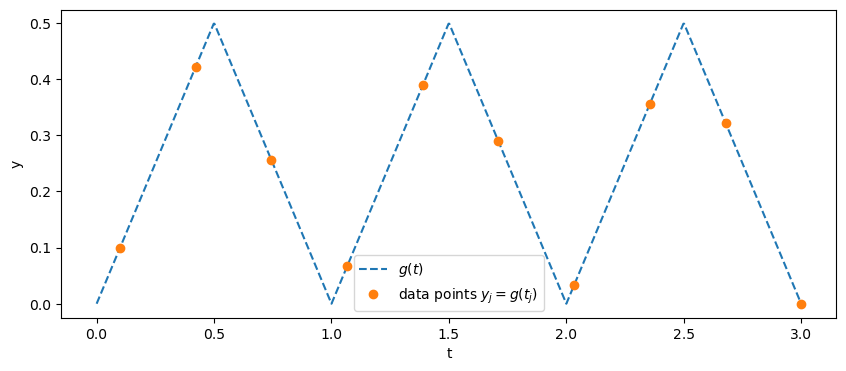

In [7]:
fig, ax = plt.subplots(figsize=(10, 4)) # create a figure and axis
ax.set_xlabel('t') # set the x-label
ax.set_ylabel('y') # set the y-label
ax.plot(dense_t, dense_g, '--', label=r'$g(t)$') # plot the function g(t)
ax.plot(t_j, y_j, "o", label=r'data points $y_j = g(t_j)$') # plot the data points
ax.legend() # set the legend

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Create the vector $\hat{x}$ that contains the coefficients of the least-squares solution.
</div>

In [ ]:
# ----- YOUR CODE
...
x_hat = ...
# --------- END YOUR CODE
print(f"x_hat = {x_hat}") # print the result

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Create the array ''approximations'', that contains the values of the approximation function $\Phi(t, \hat{x})$ for $t$ in the array ''dense_t''.
</div>

In [ ]:
# ----- YOUR CODE
...
approximations = ...
# --------- END YOUR CODE

## Then we visualize the data together with the approximation function

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4)) # create a figure and axis
ax.set_xlabel('t') # set the x-label
ax.set_ylabel('y') # set the y-label
ax.plot(dense_t, dense_g, '--', label=r'$g(t)$') # plot the function g(t)
ax.plot(t_j, y_j, "o", label=r'data points $y_j = g(t_j)$') # plot the data points
ax.plot(dense_t, approximations, label=r'$\Phi(t ; \hat{x}) \approx g(t)$') # plot the approximations of g(t)
ax.legend() # set the legend

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Comment the plot that you have obtained.
</div>

-- YOUR ANSWER

...

-- END YOUR ANSWER

## Programming tasks for exercise 3 (a variance estimation problem)

### Description

In this task, we generate random data according to a normal distribution with variance $\sigma^2$.
Then, we will use the procedure decribed in the exercise sheet to estimate the variance from the data.

We will also highlight the optimal value of the objective function (7).

### Generate the data

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Generate the data $y_1, \dots, y_{10}$ according to the random distribution $y_j \sim \mathcal{N}(0, \sigma^2)$ with $\sigma=2$, and store them in an array ''y''.
</div>

In [ ]:
true_sigma = 2. # true value of sigma
# ----- YOUR CODE
...
# --------- END YOUR CODE

### Compute the estimate

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Compute the estimate $\hat{\sigma}$ using the formula derived in question 3 of Exercise 3. Compare it to the true value $\sigma_{\text{true}}=2$.
</div>

In [ ]:
# ----- YOUR CODE
hat_sigma = ...
# --------- END YOUR CODE
print(f"true_sigma = {true_sigma}, hat_sigma = {hat_sigma}")

### The objective function

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Complete the following code to compute the likelihood value for a given value of $\sigma$.
</div>

In [ ]:
def likelihood_single(sigma, y_single):
    """
        Compute the likelihood for given sigma and a single data point y_single.
    """
    # ----- YOUR CODE
    likelihood_value = ...
    # --------- END YOUR CODE
    return likelihood_value

def likelihood(sigma, y):
    """
        Compute the likelihood for given sigma and data y = (y1, y2, ..., yn).
        Hint: use the function likelihood_single defined above.
    """
    # ----- YOUR CODE
    total_likelihood = ...
    # --------- END YOUR CODE
    return total_likelihood

### Vizualize the likelihood

Here, we plot the graph of the likelihood as a function of $\sigma$, and highlight the maximum.

In [ ]:
sigma_array = np.linspace(1., 5., 200) # array for sigma
likelihood_values = np.array([likelihood(sigma, y) for sigma in sigma_array]) # compute likelihood values for each sigma

fig, ax = plt.subplots() # create a figure and axis
ax.set_yscale('log') # set y-scale to logarithmic
ax.set_xlabel(r"$\sigma$") # set the x-label
ax.set_ylabel("Likelihood") # set the y-label
ax.plot(sigma_array, likelihood_values, label=r"$p(y \vert \sigma)$") # plot objective function

ax.axvline(hat_sigma, color='r', linestyle='--', label=r"$\hat{\sigma}$") # vertical line at hat_sigma
ax.axhline( likelihood(hat_sigma, y), color='r', linestyle='--') # horizontal line at hat_sigma

ax.axvline(true_sigma, color='g', linestyle='--', label=r"$\sigma_{\text{true}}$") # vertical line at true_sigma
ax.axhline( likelihood(true_sigma, y), color='g', linestyle='--') # horizontal line at true_sigma

ax.legend() # set the legend

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Comment the plot that you have obtained.
</div>

-- YOUR ANSWER

...

-- END YOUR ANSWER